### 1. Using the 02_sales.csv, show effects of interactions, if any, on the linear regression model to predict the total_sales for a new area using given sales from three areas.


In [1]:
# install necessary packages
#!pip install pandas
#!pip install scikit-learn
#!pip install statsmodels
#!pip install matplotlib
#!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn import metrics
from math import log, exp
import statistics as stats

In [3]:
# import the data
sales = pd.read_csv('02_sales.csv')

# get a quick view of the data set
sales.head()

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
0,1000,0.79,0.80,0.02,1.75
1,1001,0.83,0.08,0.18,1.75
2,1002,0.85,0.01,0.22,1.75
3,1003,1.25,0.00,0.03,1.75
4,1004,0.72,0.04,0.10,1.74


In [4]:
# get basic info of the data set
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3000 non-null   int64  
 1   area1_sales  3000 non-null   float64
 2   area2_sales  3000 non-null   float64
 3   area3_sales  3000 non-null   float64
 4   total_sales  3000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.3 KB


In [5]:
# Split the data
x = sales.iloc[:,1:4]
y = sales.iloc[:,4]
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.25 , random_state=42)

In [6]:
# combine x_train and y_train
train = pd.concat([x_train, y_train], axis = 1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250 entries, 2922 to 860
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area1_sales  2250 non-null   float64
 1   area2_sales  2250 non-null   float64
 2   area3_sales  2250 non-null   float64
 3   total_sales  2250 non-null   float64
dtypes: float64(4)
memory usage: 87.9 KB


In [8]:
# determine the model with interaction terms
formula = "total_sales ~ area1_sales + area2_sales + area3_sales + area1_sales*area2_sales + area1_sales*area3_sales + area2_sales*area3_sales"

# fit the model
olsmod = smf.glm(formula = formula, data = sales)
olsres = olsmod.fit()

# summerize the model
print(olsres.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_sales   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                        0.033882
Method:                          IRLS   Log-Likelihood:                 823.99
Date:                Sun, 22 Jan 2023   Deviance:                       101.41
Time:                        17:04:19   Pearson chi2:                     101.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9175
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

The p-values of all variables, including the interaction terms, are less than 0.01. Therefore, all the variables can be included in the model. 

The model for predicting the total sales for a new area based on the sales of the three known areas would be like:<br><br>*total_sales = 0.3132 + 0.7781\*area1_sales + 0.6315\*area2_sales + 1.2293\*area3_sales + 0.4184\*area1_sales\*area2_sales + 1.2196\*area1_sales\*area3_sales + 1.2131\*area2_sales\*area3_sales*

Text(0.5, 1.0, 'Predicted Sales vs. Actual Sales')

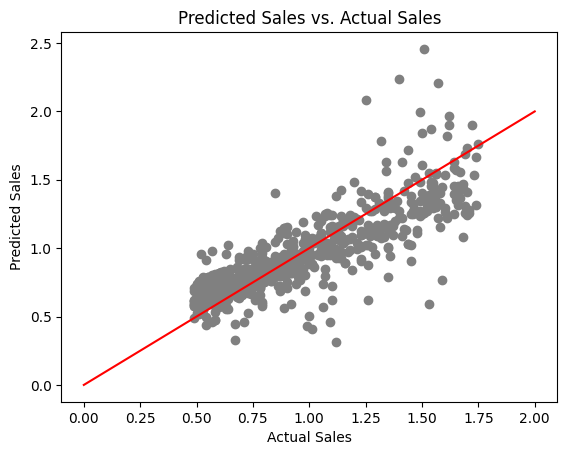

In [9]:
# Test the model on testing data set
y_pred = olsres.predict(x_test)

# Plot the comparison
fig, ax = plt.subplots()
ax.plot(range(3), range(3), color = 'r')
ax.scatter(y_test, y_pred, color = 'grey')
ax.set_xlabel("Actual Sales")
ax.set_ylabel("Predicted Sales")
ax.set_title("Predicted Sales vs. Actual Sales")
#ax.scatter(range(750), y_test, color = 'b', label="True")
#ax.scatter(range(750), y_pred, color = "r", label="OLS prediction")
#ax.legend(loc="best")

According to the plot above, the scatter dots of Predicted Sales over the Actual Sales are basically surrounding the diagonal line. It implies that the Predicted Sales are not quite different from the Actual Sales, which means the model predicted the testing set well.

In [10]:
# Calculate the OOS R-squared
y_bar = stats.mean(y_test)
n = 0
d0 = 0
d = 0

for p, t in zip(y_pred, y_test):
    d0 += (p - y_bar)**2
    d += (p - t)**2
    n += 1

D0 = d0 / n
D = d / n

OOS_R2 = 1 - (D / D0)
OOS_R2

0.6236875476937465

The Out-of-Sample $R^2$ is about 0.624, which is a good number. The model performs well outside of the training set.

### 2. Develop a Logistic Regression Model using 02_customer.csv to predict whether the customer will purchase the product. Also train trimmed logistic regression models. Compute the OOS R2 for the models you train and compare the models based on this metric. 

The model for predicting the total sales for a new area based on the sales of the three known areas would be like:<br><br>*total_sales = 0.3132 + 0.7781\*area1_sales + 0.6315\*area2_sales + 1.2293\*area3_sales + 0.4184\*area1_sales\*area2_sales + 1.2196\*area1_sales\*area3_sales + 1.2131\*area2_sales\*area3_sales*

In [11]:
# import the csv file
customer = pd.read_csv("customer.csv")

# get the first five rows of the data set
customer.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
# get the basic info of the dataset
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [13]:
# Convert Male into 0 and Female into 1
customer_original = customer.copy()

customer.loc[customer['Gender'] == 'Male', 'Gender'] = 0
customer.loc[customer['Gender'] == 'Female', 'Gender'] = 1

customer.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [14]:
def evaluate(X, y, model):
    '''evaluate the model by its null deviance, residual deviance, and R-sqaured'''
    # D = -2*sum[y*log(p) + (1-y)*log(1-p)]
    # log loss = -(y*log(p) + (1-y)*log(1-p))
    # predict gives the output of 0 or 1; predic_proba gives the probability of 1
    #D1 = 2 * metrics.log_loss(y, model.predict_proba(X), normalize=False)
    D = 0
    for i, y_i in zip(model.predict_proba(X), y):
        yy = (y_i)*log(i[1]) + (1 - y_i)*log(i[0])
        D += yy
    D = D * (-2)
    
    # D0 = -2*sum[y*log(y_bar) + (1-y)*log(1-y_bar)]    
    D0 = 0
    y_bar = stats.mean(y)
    for y_i in y:
        yy = (y_i)*log(y_bar) + (1 - y_i)*log(1 - y_bar)
        D0 += yy
    D0 = D0 * (-2)
    
    r2 = 1 - (D / D0)
    
    print(f"Null Deviance: {D0} \nResidual Deviance: {D} \nR-squared: {r2}")
    return r2

In [15]:
def r2(X, y, model):
    '''Return the R-squared of the model'''
    r2 = metrics.r2_score(y, model.predict(X))
    return r2

In [16]:
# model 1: include all three variables (gender, age, and estimated salary) but no interaction term
y = customer['Purchased']
x_1 = customer[['Gender', 'Age', 'EstimatedSalary']]

# scale the data
x_1 = RobustScaler().fit_transform(x_1)

# fit the model
model_1 = LogisticRegression().fit(x_1, y)

r2_1 = r2(x_1, y, model_1)

print(f"The R-square of model_1 is {r2_1}.")
rm_1 = evaluate(x_1, y, model_1)

The R-square of model_1 is 0.35784060297678977.
Null Deviance: 521.5729657959082 
Residual Deviance: 277.93301960431467 
R-squared: 0.4671253346495915


In [17]:
# create interaction terms
poly = PolynomialFeatures(2, interaction_only=True, include_bias=True)
print(poly.fit(x_1).get_feature_names_out())

x_2 = poly.fit_transform(x_1)
print(x_2)

['1' 'x0' 'x1' 'x2' 'x0 x1' 'x0 x2' 'x1 x2']
[[ 1.         -1.         -1.10769231 ...  1.10769231  1.13333333
   1.25538462]
 [ 1.         -1.         -0.12307692 ...  0.12307692  1.11111111
   0.13675214]
 [ 1.          0.         -0.67692308 ... -0.         -0.
   0.40615385]
 ...
 [ 1.          0.          0.8        ...  0.         -0.
  -0.88888889]
 [ 1.         -1.         -0.06153846 ...  0.06153846  0.82222222
   0.05059829]
 [ 1.          0.          0.73846154 ...  0.         -0.
  -0.55794872]]


In [18]:
# model 2: include all three variables and all the interaction terms
model_2 = LogisticRegression().fit(x_2, y)

r2_2 = r2(x_2, y, model_2)

print(f"The R-square of model_2 is {r2_2}.")
rm_2 = evaluate(x_2, y, model_2)

The R-square of model_2 is 0.4884492938967647.
Null Deviance: 521.5729657959082 
Residual Deviance: 222.92322670469656 
R-squared: 0.5725943610506712


In [19]:
# model 3: include the three main variables and the interaction term of Gender and Age
x_3 = x_2[:,0:5]

model_3 = LogisticRegression().fit(x_3, y)

r2_3 = r2(x_3, y, model_3)

print(f"The R-square of model_3 is {r2_3}.")
rm_3 = evaluate(x_3, y, model_3)

The R-square of model_3 is 0.3469565454001251.
Null Deviance: 521.5729657959082 
Residual Deviance: 276.9878525043773 
R-squared: 0.4689374820612102


In [20]:
# model 4: include the three main variables and the interaction term of Gender and EstimatedSalary
x_4 = x_2[:,[0,1,2,3,5]]

model_4 = LogisticRegression().fit(x_4, y)

r2_4 = r2(x_4, y, model_4)

print(f"The R-square of model_4 is {r2_4}.")
rm_4 = evaluate(x_4, y, model_4)

The R-square of model_4 is 0.33607248782346055.
Null Deviance: 521.5729657959082 
Residual Deviance: 277.6403509285574 
R-squared: 0.4676864616537695


In [21]:
# model 5: include the three main variables and the interaction term of Age and EstimatedSalary
x_5 = x_2[:,[0,1,2,3,6]]

model_5 = LogisticRegression().fit(x_5, y)

r2_5 = r2(x_5, y, model_5)

print(f"The R-square of model_5 is {r2_5}.")
rm_5 = evaluate(x_5, y, model_5)

The R-square of model_5 is 0.5211014666267584.
Null Deviance: 521.5729657959082 
Residual Deviance: 223.76734815267656 
R-squared: 0.5709759461723389


In [22]:
# model 6: include the three main variables, Gender*Age, and Gender*EstimatedSalary
x_6 = x_2[:,0:6]

model_6 = LogisticRegression().fit(x_6, y)

r2_6 = r2(x_6, y, model_6)

print(f"The R-square of model_6 is {r2_6}.")
rm_6 = evaluate(x_6, y, model_6)

The R-square of model_6 is 0.3687246605534543.
Null Deviance: 521.5729657959082 
Residual Deviance: 275.5297778144171 
R-squared: 0.4717330155446897


In [23]:
# model 7: include the three main variables, Gender*Age, and Age*EstimatedSalary
x_7 = x_2[:,[0,1,2,3,4,6]]

model_7 = LogisticRegression().fit(x_7, y)

r2_7 = r2(x_7, y, model_7)

print(f"The R-square of model_7 is {r2_7}.")
rm_7 = evaluate(x_7, y, model_7)

The R-square of model_7 is 0.4993333514734293.
Null Deviance: 521.5729657959082 
Residual Deviance: 222.97128115839297 
R-squared: 0.5725022273381367


In [24]:
# model 8: include the three main variables, Gender*EstimatedSalary, and Age*EstimatedSalary
x_8 = x_2[:,[0,1,2,3,5,6]]

model_8 = LogisticRegression().fit(x_8, y)

r2_8 = r2(x_8, y, model_8)

print(f"The R-square of model_8 is {r2_8}.")
rm_8 = evaluate(x_8, y, model_8)

The R-square of model_8 is 0.5211014666267584.
Null Deviance: 521.5729657959082 
Residual Deviance: 223.79952355057284 
R-squared: 0.5709142570128036


In [25]:
# Summarize the R-squares
r2 = [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8]
rm = [rm_1, rm_2, rm_3, rm_4, rm_5, rm_6, rm_7, rm_8]
formula = ['G+A+E', 'G+A+E+GA+GE+AE', 'G+A+E+GA','G+A+E+GE','G+A+E+AE','G+A+E+GA+GE','G+A+E+GA+AE','G+A+E+GE+AE']
#ind = ['model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8']
ind = []
for i in range(1,9):
    ind.append('model_{0}'.format(i))

r_squared = {}
r_squared["Calculated by Package"] = r2
r_squared["Calculated by Deviance"] = rm
r_squared["Foumula"] = formula

r_squared = pd.DataFrame(r_squared, index = ind)
r_squared

,Calculated by Package,Calculated by Deviance,Foumula
model_1,0.357841,0.467125,G+A+E
model_2,0.488449,0.572594,G+A+E+GA+GE+AE
model_3,0.346957,0.468937,G+A+E+GA
model_4,0.336072,0.467686,G+A+E+GE
model_5,0.521101,0.570976,G+A+E+AE
model_6,0.368725,0.471733,G+A+E+GA+GE
model_7,0.499333,0.572502,G+A+E+GA+AE
model_8,0.521101,0.570914,G+A+E+GE+AE


In [26]:
# Using statsmodels
# model 2: include all three variables (gender, age, and estimated salary) and the interaction term between Gender and Age

# fit the model
#model = smf.logit("Purchased ~ Gender + Age + EstimatedSalary + Gender*Age + Gender*EstimatedSalary + Age*EstimatedSalary", data = customer).fit()
#model.summary()

### 3. Pick the best model wrt to the OOS R2 and interpret the model’s coefficients

In [27]:
# Choose the model with the highest R-squared according to the results calculated by using deviance

r_squared[r_squared['Calculated by Deviance'] == max(r_squared['Calculated by Deviance'])]

,Calculated by Package,Calculated by Deviance,Foumula
model_2,0.488449,0.572594,G+A+E+GA+GE+AE


In [28]:
# Get the coefficients of the model
coeffs = model_2.coef_[0,:]
print(coeffs)

# Calculate the odds
odds = []
for i in coeffs:
    odds.append(exp(i))
print(odds)

[ 2.92867919e-06 -8.70494316e-02  3.55398104e+00  2.13315109e+00
 -9.13202028e-01 -2.66985095e-01 -2.57393010e+00]
[1.0000029286834815, 0.9166317838980612, 34.952186831589174, 8.441424666521955, 0.4012373914028051, 0.7656844839991306, 0.0762353435634024]


In [29]:
# create the list of the names of the variables in the model
var = ['Intercept','Gender','Age','EstimatedSalary','Gender*Age','Gender*EstimatedSalary','Age*EstimatedSalary']

# display the odds in a dataframe
df = pd.DataFrame(dict(zip(var,odds)),index = ['odds'])
df.T

,odds
Intercept,1.000003
Gender,0.916632
Age,34.952187
EstimatedSalary,8.441425
Gender*Age,0.401237
Gender*EstimatedSalary,0.765684
Age*EstimatedSalary,0.076235


- **Intercept:** the odds is about 1, which means without the infomation of the customer's gender, age, and estimated salary, the likelihood of purchasing the product is not expected to be affected by other latent variables.<br>&nbsp;&nbsp;&nbsp;&nbsp;
- **Gender:** the odds is about 0.92, which means the odds of buying a product of females is 0.92 times of the odds of males.<br>&nbsp;&nbsp;&nbsp;&nbsp;
- **Age:** the odds is about 34.95, which means with one unit increase in one person's age, the odds of the one buying the product is expected to be multiplied by 34.95.<br>&nbsp;&nbsp;&nbsp;&nbsp;
- **EstimatedSalary:** the odds is about 8.44, which means one unit increase in one's estimated salary, the odds of the person buying the product is expected to be multiplied by 8.44.

### 4. Plot the interactions of the ‘Age’ and ‘Gender’ features with the ‘Purchased’ output. 

In [32]:
#Age = [sublist[2] for sublist in x_2]
#AG = [sublist[4] for sublist in x_2]

Age = np.array(customer['Age'])
color = np.array(customer['Gender'])
Gender = np.array(customer_original['Gender'])
#AG = Age.T*Gender

#Age = customer[['Age']]
#Gender = customer_original[['Gender']]

In [42]:
df = pd.DataFrame(customer['Age'])
df['Gender'] = customer_original['Gender']
df['Probability'] = model_2.predict_proba(x_2)[:,1]
df.head()

,Age,Gender,Probability
0,19,Male,0.000004
1,35,Male,0.005741
2,26,Female,0.001652
3,27,Female,0.007149
4,19,Male,0.002918


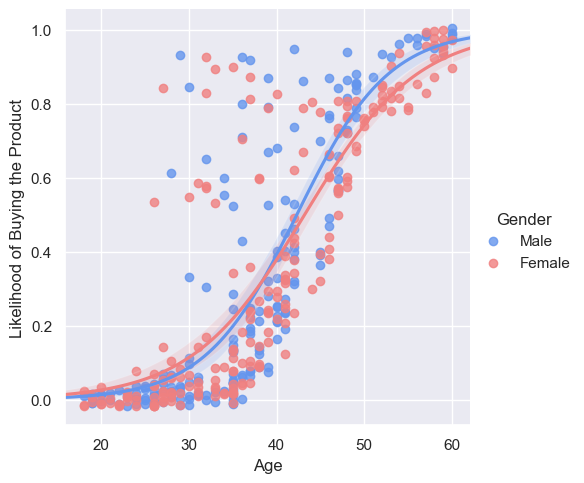

In [48]:
sns.set_theme()
pal = dict(Male="#6495ED", Female="#F08080")
g = sns.lmplot(x="Age", y="Probability", hue="Gender", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(ylabel = "Likelihood of Buying the Product")

According to the plot above, the likelihood of buying the product of males increases faster along with the increase in age than the one of females. Specifically, when Age is larger, the likelihood of buying the product of Male tend to be higher than the one of Female; when Age is smaller, the likelihood of buying the product of Female tend to be higher than the one of Male. Therefore, the plot implies a negative coefficient of the interaction term for Age and Gender, which is aligned with the model results. It manifests the necessity of including the interaction term.